In [1]:
from ROOT import *
from pmssm import PMSSM, particleDrawConfig_TeV

Welcome to JupyROOT 6.30/04


In [2]:
root_file_path = "pmssmtree_11aug2023.root"
tree_name = "mcmc"
outdir = "plots"

In [3]:
root_file = TFile(root_file_path) # type: ignore
intree = root_file.Get(tree_name)

In [4]:
pmssm_plotter = PMSSM(
    intree = intree, 
    outdir = outdir,
    particleDrawConfig= particleDrawConfig_TeV,
    canvasStyle = {
                    "energy" : "13",
                    "extraText" : "Preliminary",
                    "lumi" : "",
                    "analysisName" : "",
                }
    )

In [5]:
pmssm_plotter.printConfig("abs(chi10)")

############### abs(chi10) ###############
-Title:  m_{#tilde{#chi}^{0}_{1}}
-# of Bins:  50
-Max Range: 2500
-Min Range: 0
-Log Scale: False
-Linear Scale: 1000
-Unit: TeV


In [6]:
pmssm_plotter.printConfig()

############### abs(chi10) ###############
-Title:  m_{#tilde{#chi}^{0}_{1}}
-# of Bins:  50
-Max Range: 2500
-Min Range: 0
-Log Scale: False
-Linear Scale: 1000
-Unit: TeV
############### g ###############
-Title:  m(#tilde{g})
-# of Bins:  100
-Max Range: 7000
-Min Range: 0
-Log Scale: False
-Linear Scale: 1000
-Unit: TeV
############### t1 ###############
-Title:  m(#tilde{t}_{1})
-# of Bins:  100
-Max Range: 7000
-Min Range: 0
-Log Scale: False
-Linear Scale: 1000.0
-Unit: TeV
############### b1 ###############
-Title:  m(#tilde{b}_{1})
-# of Bins:  100
-Max Range: 7000
-Min Range: 0
-Log Scale: False
-Linear Scale: 1000.0
-Unit: TeV


In [7]:
pmssm_plotter.setConfig(particleName=None, config={
    "unit" : "TeV",
},verbose=True)

############### abs(chi10) ###############
-Title:  m_{#tilde{#chi}^{0}_{1}}
-# of Bins:  50
-Max Range: 2500
-Min Range: 0
-Log Scale: False
-Linear Scale: 1000
-Unit: TeV
############### g ###############
-Title:  m(#tilde{g})
-# of Bins:  100
-Max Range: 7000
-Min Range: 0
-Log Scale: False
-Linear Scale: 1000
-Unit: TeV
############### t1 ###############
-Title:  m(#tilde{t}_{1})
-# of Bins:  100
-Max Range: 7000
-Min Range: 0
-Log Scale: False
-Linear Scale: 1000.0
-Unit: TeV
############### b1 ###############
-Title:  m(#tilde{b}_{1})
-# of Bins:  100
-Max Range: 7000
-Min Range: 0
-Log Scale: False
-Linear Scale: 1000.0
-Unit: TeV


Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1
Warning in <TH2F::Sumw2>: Sum of squares of weights structure already created
Info in <TCanvas::Print>: png file plots/gluino_chi10_survival2D.png has been created


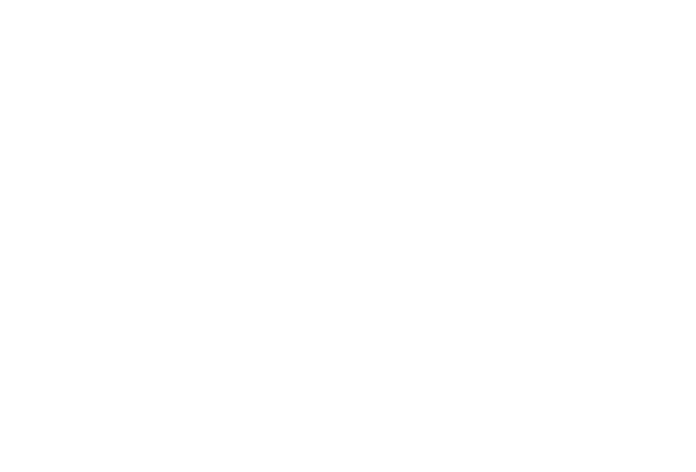

In [8]:
pmssm_plotter.survivalProbability2D(
    drawstring = "abs(chi10):g",
    name = "gluino_chi10",
    moreconstraints = [],
    )

In [9]:
pmssm_plotter.survivalProbability2D(
    drawstring = "abs(chi10):g",
    name = "gluino_chi10_higgsino_RDPlanck",
    moreconstraints = ["(Re_N_13**2+Re_N_14**2)>0.95","abs(Omegah2-0.12)<=0.012"],
    )

Warning in <TH2F::Sumw2>: Sum of squares of weights structure already created
Info in <TCanvas::Print>: png file plots/gluino_chi10_higgsino_RDPlanck_survival2D.png has been created


In [10]:
pmssm_plotter.survivalProbability2D(
    drawstring = "abs(chi10):t1",
    name = "gluino_stop1",
    moreconstraints = [],
    )

Warning in <TH2F::Sumw2>: Sum of squares of weights structure already created
Info in <TCanvas::Print>: png file plots/gluino_stop1_survival2D.png has been created


In [11]:
pmssm_plotter.survivalProbability2D(
    drawstring = "abs(chi10):g",
    name = "gluino_chi10",
    )

Warning in <TH2F::Sumw2>: Sum of squares of weights structure already created
Info in <TCanvas::Print>: png file plots/gluino_chi10_survival2D.png has been created


In [12]:
pmssm_plotter.survivalProbability2D(
    drawstring = "abs(chi10):g",
    name = "gluino_chi10",
    contourSwitch= True
    )

Warning in <TH2F::Sumw2>: Sum of squares of weights structure already created
Info in <TCanvas::Print>: png file plots/gluino_chi10_survival2DWcontours.png has been created


In [13]:
pmssm_plotter.survivalProbability2D(
    drawstring = "abs(chi10):t1",
    name = "stop_chi10",
    contourSwitch= True)

Warning in <TH2F::Sumw2>: Sum of squares of weights structure already created
Info in <TCanvas::Print>: png file plots/stop_chi10_survival2DWcontours.png has been created


In [14]:
pmssm_plotter.survivalProbability2D(
    drawstring = "abs(chi10):b1",
    name = "sbottom_chi10",
    contourSwitch= True)

Warning in <TH2F::Sumw2>: Sum of squares of weights structure already created
Info in <TCanvas::Print>: png file plots/sbottom_chi10_survival2DWcontours.png has been created


In [15]:
pmssm_plotter.impact1D(
    drawstring="b1",
    name="sbottom",
)

Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Info in <TCanvas::Print>: png file plots/sbottom_impact1D.png has been created


In [16]:
pmssm_plotter.impact1D(
    drawstring="g",
    name="gluon",
)

Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Info in <TCanvas::Print>: png file plots/gluon_impact1D.png has been created


In [17]:
pmssm_plotter.quantilePlots1D(
    drawstring="g",
    name="gluon",
)

Warning in <TFile::Append>: Replacing existing TH1: OF UF_px (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: OF UF_px (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: OF UF_px (Potential memory leak).
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Info in <TCanvas::Print>: png file plots/gluon_quantile1D.png has been created


In [18]:
pmssm_plotter.quantilePlots1D(
    drawstring="b1",
    name="sbottom",
)

Warning in <TFile::Append>: Replacing existing TH1: OF UF_px (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: OF UF_px (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: OF UF_px (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: OF UF_px (Potential memory leak).
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Info in <TCanvas::Print>: png file plots/sbottom_quantile1D.png has been created
